<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 5

### Problem 0 (3 points)

## Part 1: The Logistic-Regression Classifier in One Dimension

In [1]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall21', course='371d', homework=5):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [2]:
import pickle


file_name = 'data1d.pkl'
retrieve(file_name, homework=5)
with open(file_name, 'rb') as file:
    t = pickle.load(file)
tx, ty = t['x'], t['y']

Using previously downloaded file data1d.pkl


### Problem 1.1 (Exam Style)

$$
\ell(y, f(a)) = -y\log(\frac{1}{1 + e^{-a}}) - (1 - y)\log(1 - \frac{1}{1 + e^{-a}}) \\
= -y\log(\frac{1}{1 + e^{-a}}) - (1 - y)\log(\frac{e^{-a}}{1 + e^{-a}}) \\
= -y\ [\log{1} - \log(1 + e^{-a})] - (1 - y)[\log(e^{-a}) - \log(1 + e^{-a})] \\
= y\log(1 + e^{-a}) - [-a - \log(1 + e^{-a}) - ya + y\log(1+ e^{-a}] \\
= a + \log(1 + e^{-a}) - ya \\
= (1 - y)a + \log(1 + e^{-a})
$$

### Problem 1.2 (Exam Style)

$$
\frac{d\ell(y, f(a))}{da} = \frac{d\ell}{df} \frac{df}{da}
$$

$$
\frac{d\ell}{df} = \frac{d}{df}[-y\log{f} - (1-y)\log(1-f)] \\
= \frac{-y}{f} + \frac{1-y}{1-f} = \frac{-y + yf + f -yf}{f(1-f)} \\
= \frac{f-y}{f(1-f)}
$$

$$
\frac{df}{da} = \frac{d}{da}[\frac{1}{1 + e^{-a}}] \\
= \frac{e^{-a}}{(1 + e^{-a})^2} = \frac{1}{1 + e^{-a}} \frac{e^{-a}}{1 + e^{-a}} \\
= \frac{1}{1+e^{-a}}(1 - \frac{1}{1+e^{-a}})
$$

$$
\frac{d\ell(y, f(a))}{da} = \frac{d\ell}{df} \frac{df}{da} \\
= [\frac{f-y}{f(1-f)}][\frac{1}{1+e^{-a}}(1 - \frac{1}{1+e^{-a}})] \\
= [\frac{f-y}{f(1-f)}] f(1-f) = f-y = \frac{1}{1+e^{-a}} - y
$$

$$
\frac{d^{2}\ell}{da^{2}} = \frac{d}{da}[\frac{1}{1+e^{-a}} - y] \\
= \frac{-e^{a}}{(1+e^{-a})^2}
$$

The second derivative of $\ell(y, f(a))$ as a function of a is always positive since the codomain of 
$e^{x}$ is $(0, \infty)$. Since the second derivative is always positive, this means that the function $\ell$ is always convex. 

### Problem 1.3 (Exam Style)

$L_{T}$ is the average of $\ell(y_{n}, f(a_{n}))$ where a_{n} = b + wx_{n} for all $n \in 1,...,N$. Problem 1.2 tells us that the second derivative of $\ell(y, f(a))$ is always positive. Knowing this, we can simplify the expressions for $\nabla \ell(y_{n}, f(a; b,w))$ and then $H_{\ell}(b, w)$. 
Using the chain rule, we know that: 

$$
\nabla \ell(y, f(x; b,w)) = \frac{d\ell(y, f(a))}{da} \nabla 
\begin{bmatrix}
b \\
w \end{bmatrix} =  \\
\frac{1}{1+e^{-(b + wx)}} - y
\begin{bmatrix}
1 \\
x \end{bmatrix} \\
= f(x; b,w) - y 
\begin{bmatrix}
1 \\
x \end{bmatrix}
$$

$$
H_{\ell}(b,w) = \nabla \nabla \ell(y, f(x; b,w)) = 
(\frac{1}{1+e^{b + wx}} - y
\begin{bmatrix}
1 \\
x \end{bmatrix}) \\
= \nabla f(x; b,w)\ [1\ \ x] = \\
\frac{df}{da}
\nabla 
\begin{bmatrix}
b \\
w \end{bmatrix}\ [1\ \ x] = \\
f(1-f) 
\begin{bmatrix}
1 \\
x \end{bmatrix}\ [1\ \ x]
$$

Since 
$
\begin{bmatrix}
1 \\
x \end{bmatrix}\ [1\ \ x]$ is an inner product, the matrix of this product will be symmetric and have non-negative eigenvalues. Multiplying this matrix by $f(1-f)$ will never cause the eigenvalues to become negative since this value will always be positive (as proven above). Extending this to $H_{L_{T}}$, since the derivative of a sum is equivalent to summing the derivatives of each item in the summation and we know that each Hessian in this sum will have non-negative values, we know that $H_{L_{T}}$ will also have non-negative eigenvalues, meaning that $L_{T}(b,w)$ is a convex function. 

### Problem 1.4 (Exam Style)

$$
L_{T}(b,w) = \frac{1}{N} \sum_{n=1}^N (1-y)(b+wx) + \log(1 + e^{-(b+wx)}) \\
L_{T}(b,0) = \frac{1}{N} \sum_{n=1}^N (1-y)b + \log(1 + e^{-b}) \\
= \frac{1}{N} [\sum_{n=1}^F \log(1 + e^{-b}) + \sum_{n=1}^{N-F} b + \log(1 + e^{-b})] \\
= \frac{1}{N} [F \log(1 + e^{-b}) + (N-F)b + (N-F) \log(1 + e^{-b})] \\
= \frac{1}{N} [(N-F)b + N \log(1 + e^{-b})] \\
= \frac{N-F}{N} b + \log(1 + e^{-b})
$$

$$
L_{T}(0,0) = \frac{N-F}{N} (0) + \log(1 + e^{0}) \\
= \log(1 + 1) = \log{2} \approx 0.301
$$

### Problem 1.5

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def logistic(a):
    return 1 / (1 + np.e**(-a))


In [203]:
def affine(x, v):
    b = v[0]
    w = v[1]
    return b + np.transpose(w)*x


In [204]:
def score(x, v):
    return logistic(affine(x,v))


In [205]:
def h(x, v):
    if score(x,v) > 0.500:
        return 1
    else:
        return 0

In [206]:
def plot_score(x, y, v, loss_name, x_bound, n_points, type_size):
    preds = np.empty(shape=(n_points, 2))
    x_range = np.linspace(-x_bound, x_bound, num=n_points)
    for n in range(n_points):
        s = score(x_range[n],v)
        p = h(x_range[n], v)
        preds[n] = [s,p]
    plt.plot(x_range, preds)
    plt.legend(['score', 'h'])
    plt.plot(x,y, 'o')
    plt.title(('Score and Predictor Using {}').format(loss_name), 
              fontsize = type_size)
    plt.xlabel('x (decision boundary = 0.500)', 
               fontsize = type_size)
    plt.ylabel('y', fontsize = type_size)
    plt.figure(figsize=(15,5))
    plt.show()

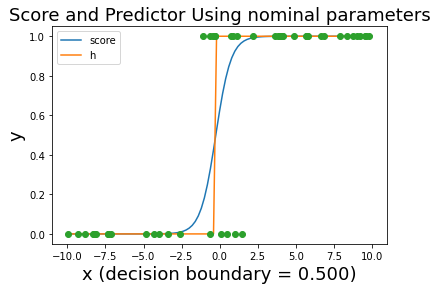

<Figure size 1080x360 with 0 Axes>

In [207]:
v_hat_test = np.array((0.5, 2.))
plot_score(tx, ty, v_hat_test, 'nominal parameters',
    x_bound=10., n_points=101, type_size=18)

### Problem 1.6

In [260]:
def cross_entropy(y, p):
    if y == 1:
        return -np.log(p)
    else:
        return -np.log(1-p)

In [261]:
def sample_loss(x, y, v, loss=cross_entropy):
    s = score(x,v)
    return loss(y,s)


In [262]:
def risk(v, y, x, loss=cross_entropy):
    N = len(x)
    L = 0.0
    for n in range(N):
        L += sample_loss(x[n], y[n], v, loss)
    return L / N

In [411]:
import scipy.optimize 

def train(x, y, loss=cross_entropy):
    return scipy.optimize.minimize(risk, 
                                   np.array([0.0,0.0]), 
                                   args=(y,x,loss), 
                                   method='CG')['x']

In [412]:
v_hat_ce = train(tx, ty)
print(v_hat_ce)

[0.47471912 0.77146407]


### Problem 1.7

In [265]:
ce_name = 'cross entropy loss'
x_bound, n_points = 10., 101
type_size = 18

In [484]:
def plot_losses(x, y, v, loss_fct, loss_name, type_size):
    y_hats = []
    losses = []
    cmap = []
    for i in range(len(x)):
        losses.append(sample_loss(x[i], y[i], v, loss_fct))
        y_hat = h(x[i], v)
        if y[i] == 1 and y_hat == 1:
            cmap.append('b')
        elif y[i] == 1 and y_hat == 0:
            cmap.append('g')
        elif y[i] == 0 and y_hat == 0:
            cmap.append('r')
        else:
            cmap.append('orange')
    plt.scatter(x,losses, c=cmap)
    t = 'Training Point Losses. Decision Boundary x = {}. Risk = {}'
    plt.title(t.format(round(-v[0]/v[1],3), 
                       round(sum(losses)/len(losses),3)), 
              fontsize = type_size)
    # plt.legend(fontsize = type_size)
    plt.axvline(-v[0]/v[1], color='black')
    plt.xlabel('x', fontsize = type_size)
    plt.ylabel(('{}').format(loss_name), fontsize = type_size)
    plt.figure(figsize=(15,5))
    plt.show()


In [485]:
import matplotlib.cm as cm

def plot_contours(x, y, v, loss_fct, loss_name, n_points, 
                  type_size, fig_size=(15, 12)):
    b_range = np.linspace(v[0] - 3., v[0] + 3., n_points)
    w_range = np.linspace(v[1]-0.1, v[1]+5., n_points)
    box = (b_range[0], b_range[-1], w_range[0], w_range[-1])
    b_grid, w_grid = np.meshgrid(b_range, w_range)
    z_grid = np.stack((b_grid, w_grid), axis=0)
    fct_grid = risk(z_grid, y, x, loss_fct)
    fig = plt.figure(figsize=fig_size, tight_layout=True)
    img = plt.imshow(fct_grid, interpolation='bilinear',
               origin='lower', extent=box, cmap=cm.hot)
    plt.contour(b_grid, w_grid, fct_grid, 50, colors='w', 
                linewidths=1)
    bar = fig.colorbar(img, shrink=0.72)
    bar.ax.tick_params(labelsize=type_size)
    plt.title(('Risk Using {}').format(loss_name))
    plt.xlabel('$b$', fontsize=type_size)
    plt.ylabel('$w$', fontsize=type_size)

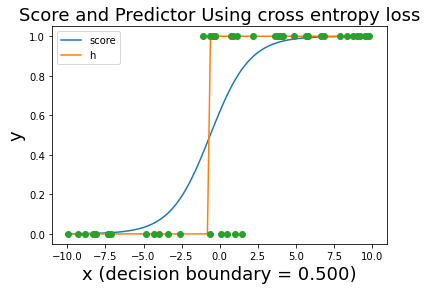

<Figure size 1080x360 with 0 Axes>

In [486]:
plot_score(tx, ty, v_hat_ce, ce_name, x_bound, n_points, type_size)

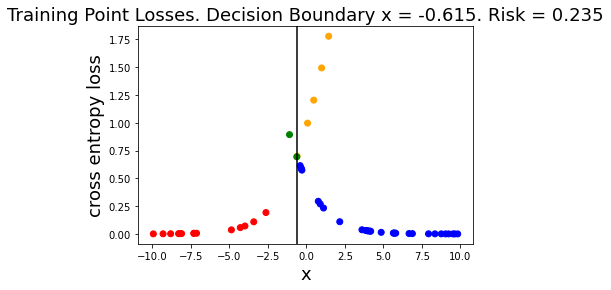

<Figure size 1080x360 with 0 Axes>

In [487]:
plot_losses(tx, ty, v_hat_ce, cross_entropy, ce_name, type_size)

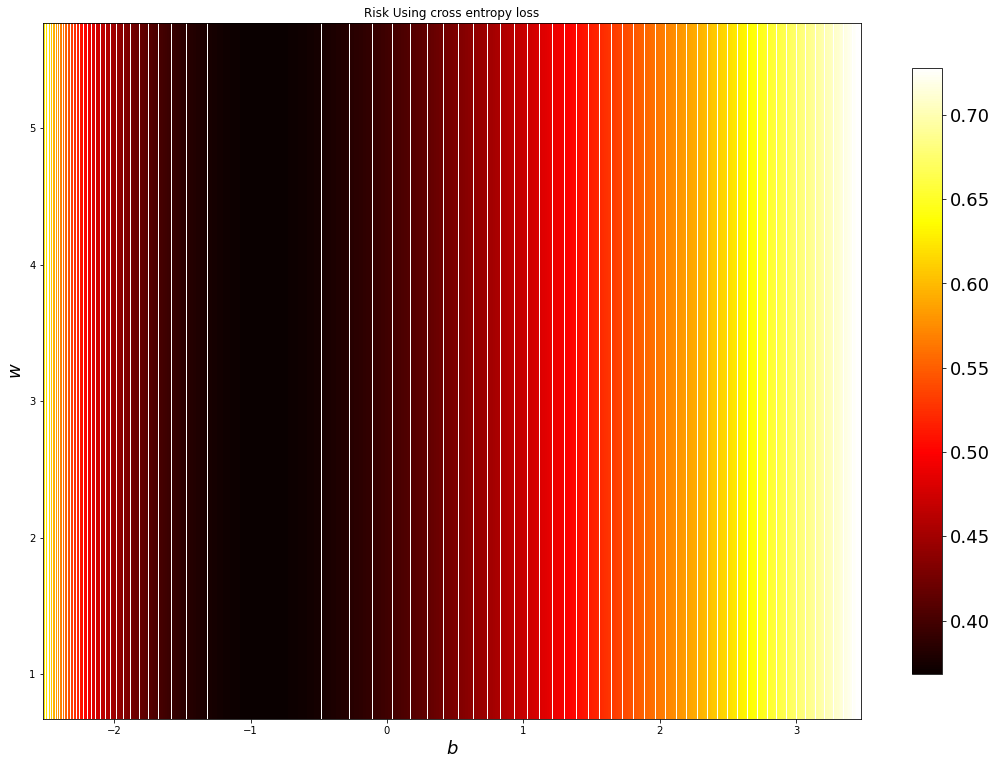

In [488]:
plot_contours(tx, ty, v_hat_ce, cross_entropy, ce_name, n_points, type_size)

### Problem 1.8

In [489]:
def quadratic(y, p):
    return (y-p)**2

In [490]:
v_hat_q = train(tx, ty, loss=quadratic)
q_name = 'quadratic loss'

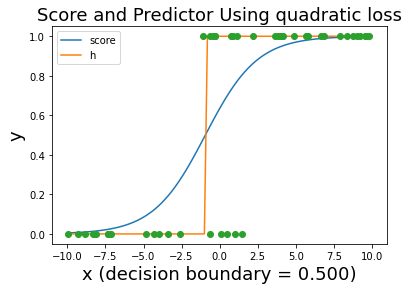

<Figure size 1080x360 with 0 Axes>

In [491]:
plot_score(tx, ty, v_hat_q, q_name, x_bound, n_points, type_size)

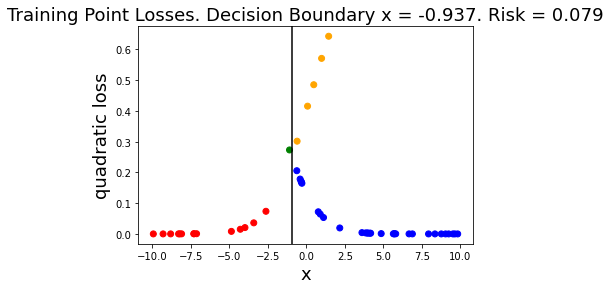

<Figure size 1080x360 with 0 Axes>

In [492]:
plot_losses(tx, ty, v_hat_q, quadratic, q_name, type_size)

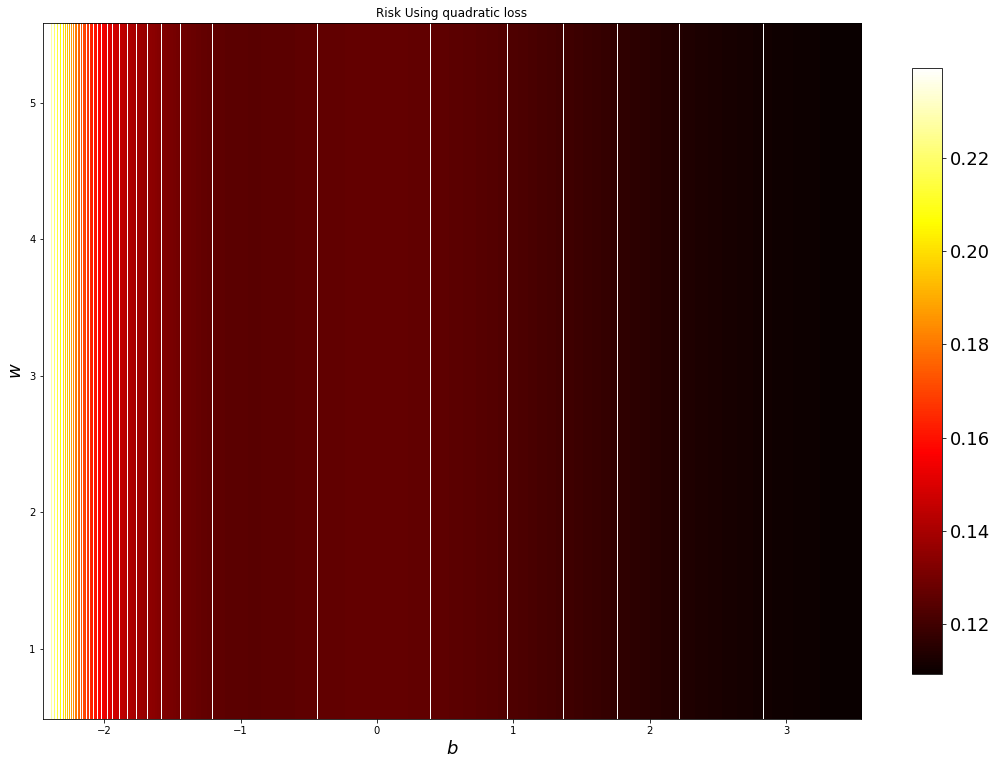

In [493]:
plot_contours(tx, ty, v_hat_q, quadratic, q_name, 
              n_points, type_size)

### Problem 1.9 (Exam Style)

In the isocontours shown above, the distance between the contours shows the relative value of the derivative of the risk function at that point. In the cross entropy loss contour plot, the derivative of the risk function always increases as the risk increases which shows that the second derivative is positive. This same pattern does not appear in the quadratic risk isocontour plot. Specifically, between b=1 and b=3, as the risk decreases, the contour lines briefly start to become closer together again, indicating that the first derivative of the risk function is increasing at this point, making the second derivative negative which means it is not convex at this point. 

### Problem 1.10

In [494]:
file_name_sep = 'data1d_sep.pkl'
retrieve(file_name_sep)
with open(file_name_sep, 'rb') as file:
    t_sep = pickle.load(file)
tx_sep, ty_sep = t_sep['x'], t_sep['y']

Using previously downloaded file data1d_sep.pkl


In [495]:
v_hat_sep = train(tx_sep, ty_sep)
print(v_hat_sep)

[ 1.82232775 12.15679632]


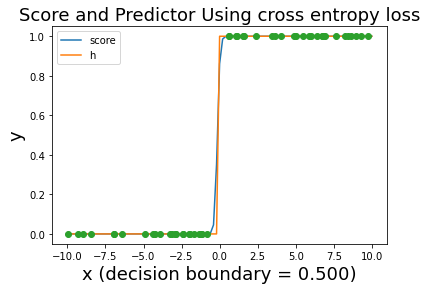

<Figure size 1080x360 with 0 Axes>

In [496]:
plot_score(tx_sep, ty_sep, v_hat_sep, ce_name, x_bound, 
           n_points, type_size)

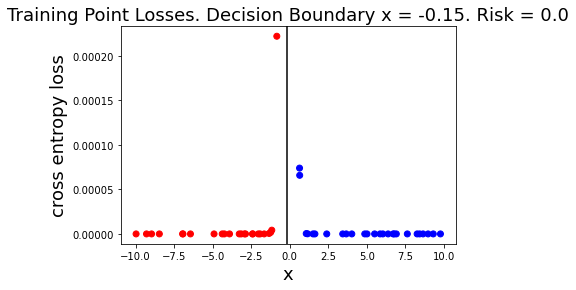

<Figure size 1080x360 with 0 Axes>

In [497]:
plot_losses(tx_sep, ty_sep, v_hat_sep, cross_entropy, 
            ce_name, type_size)

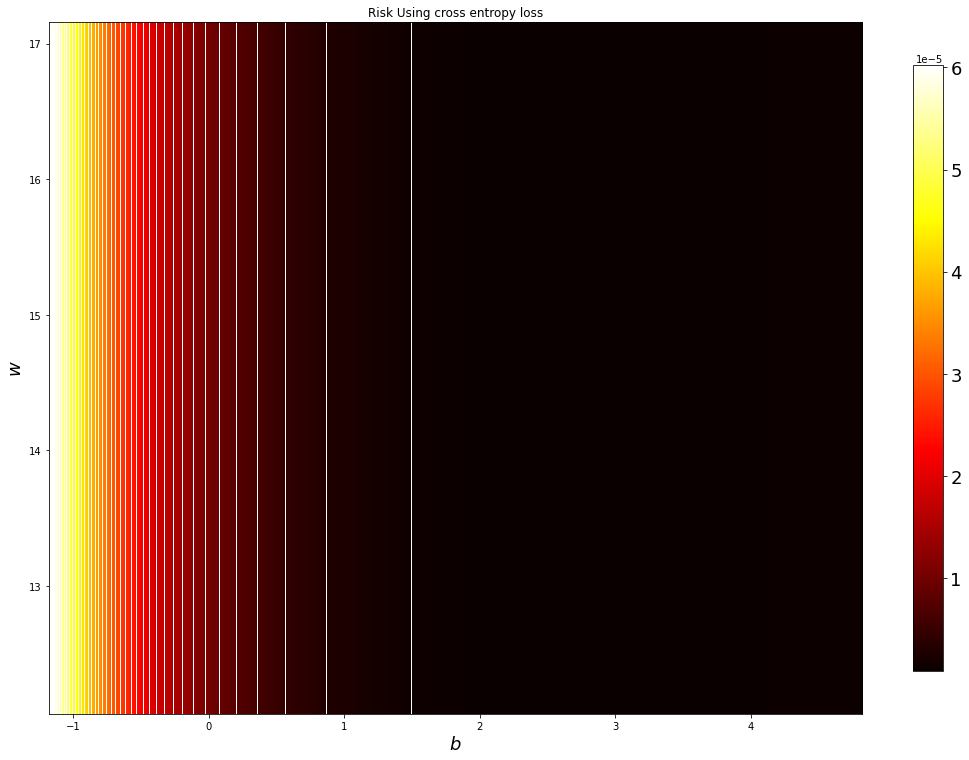

In [498]:
plot_contours(tx_sep, ty_sep, v_hat_sep, cross_entropy, ce_name, 
              n_points, type_size)

### Problem 1.11

In [500]:
d_boundary = -v_hat_sep[0] / v_hat_sep[1]
print(d_boundary)

-0.14990197279674405


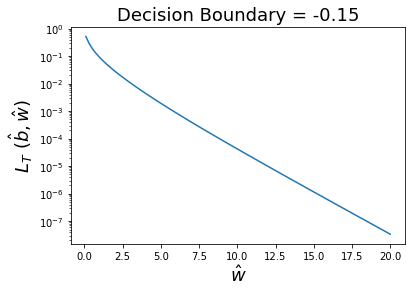

In [531]:
slopes = np.linspace(0.1, 20, n_points)
intercepts = []
risks = []
for w in slopes:
    b = -w*d_boundary - np.log(np.e**(1/2) - 1)
    intercepts.append(b)
    risks.append(risk([b,w], ty_sep, tx_sep, loss=cross_entropy))
    
plt.semilogy(slopes, risks)
plt.title(('Decision Boundary = {}').format(round(d_boundary, 3)), 
          fontsize=type_size)
plt.xlabel('$\hat w$', fontsize=type_size)
plt.ylabel('$L_{T}\ (\hat b, \hat w)$', fontsize=type_size)
plt.show()

The risk decreases, approaching 0 as $\hat w$ increases.

### Problem 1.12 (Exam Style)

The cost of running the algorithm longer begins to outweigh improvements in the risk once the reduction in risk after one loop drops below a certain threshold. 

### Problem 1.13

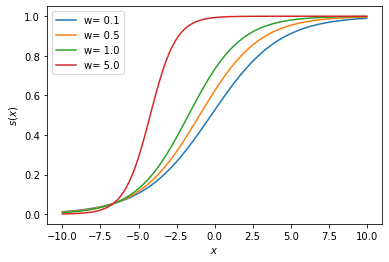

In [530]:
x_range = np.linspace(-10., 10, n_points)
w = [0.1, 0.5, 1., 5.]
b = []
for i in w:
    b.append(-i*d_boundary - np.log(np.e**(1/2) - 1))

for s in range(len(w)):
    scores = score(x_range, [w[s], b[s]])
    plt.plot(x_range, scores, 
             label = ('w= {}').format(w[s]))

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$s(x)$')
plt.show() 

The score function increases more gradually.

### Problem 1.14 (Exam Style)

$$
b = -w \hat \chi - \log(e^{1/2} - 1)
$$

Since we're evaluating what happens to the loss function as $w \to \infty$, we can go ahead and get rid of the constant in the expression for b since this term becomes insignificant in the value of $b$ as $w \to \infty$.

$$
\ell_{s}(x, True) = -\log(\frac{1}{1 + e^{-(-w \hat \chi + wx)}}) \\
= -\log(\frac{1}{1 + e^{w(\hat \chi - x)}})
$$
Since we know that $x$ will never equal $\hat \chi$ exactly and that the decision boundary correctly classifies all points, we also know that $x$ will always be greater than $\hat \chi$ and $w$ will always be multiplied by a negative, non-zero value. So, as $w \to \infty$, $e^{w(\hat \chi - x)}$ will approach 0 and the denominator overall will approach 1, causing the sample loss function overall to converge to $-\log{1}$ which is equal to 0.  

$$
\ell_{s}(x, False) = -\log(1 - \frac{1}{1 + e^{-(-w \hat \chi + wx)}}) \\
= -\log(1 - \frac{1}{1 + e^{w(\hat \chi - x)}})
$$
With the same assumptions as above, but now knowing that $x$ will always be less than $\hat \chi$, we know that as $w \to \infty$, $e^{w(\hat \chi - x)}$ will also approach $\infty$ and the entire denominator of the fraction will approach $\infty$. This causes the loss function overall to converge to $- \log(1 - 0) = - \log(1)$ which is equal to 0.

Since the sample loss for all $x$ values when y = True and when y = False both converge to 0, this is why the sample risk overall approaches 0 as $w \to \infty$ 

### Problem 1.15

In [545]:
def regularized_risk(v, y, x, loss=cross_entropy, mu=1.e-3):
    return risk(v, y, x, loss=cross_entropy) + mu * np.linalg.norm(v)**2

def train_reg(x, y, loss=cross_entropy, mu=1.e-3):
    return scipy.optimize.minimize(regularized_risk, np.array([0.0,0.0]), 
                                   args=(y,x,loss, mu), method='CG')['x']
    

In [546]:
v_hat_reg = train_reg(tx_sep, ty_sep)
print(v_hat_reg)

[0.3635696  3.29559976]


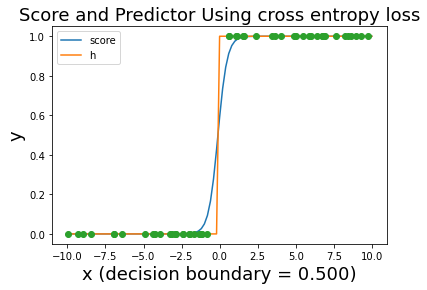

<Figure size 1080x360 with 0 Axes>

In [547]:
plot_score(tx_sep, ty_sep, v_hat_reg, ce_name, x_bound, 
           n_points, type_size)

The non-regularized predictor above has a much steeper step along it's decision boundary. The regularized predictor also looks like it would have a higher risk since some of the points near the decision boundary are now further from the predictor than in the non-regularized predictor.